In [4]:
%config IPCompleter.greedy=True
%matplotlib inline
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt
#from matplotlib import gridspec
import time
#####################################################################

### This code is based on a slightly modified version of [1]. The following assumptions are made for derivations

- Upper and lower media are denoted by substrate $I$ and $II$, respectively. 
- $R_i$ and $T_i$ respectively denote normalized reflected and Transmitted field amplitudes for the $i$-th order.
- Physics notation has been used, i.e. $ \exp(\jmath(\omega t - \mathbf{k} \cdot \mathbf{r})) $
- $\mu=\mu_0$ for all media
- For the TE polarization $\mathbf{E}=E_y\mathbf{\hat{y}}$ and $\mathbf{H}=H_x\mathbf{\hat{x}}+H_z\mathbf{\hat{z}}$
- parallel component of k-vector for i-th diffracted order is: $\beta_i=k_0(n_I \sin(\theta) - \frac{2\pi}{\Lambda} i)$, where $k_0$ is the free space k-vector, $n_I$ is the refractive index of the ambient medium, and $\Lambda$ is the periodicity.

** For further confusion refer to [1]** 

#### [1] M. G. Moharam, E. B. Grann, D. a. Pommet, and T. K. Gaylord, “Formulation for stable and efficient implementation of the rigorous coupled-wave analysis of binary gratings,” J. Opt. Soc. Am. A 12, 1068 (1995).


**Fields for TE polarization**
--------------------------------------------------------------------------- 

>Fields in the exterior regions, assuming the coordinate is centered at the input interface:

>>Eq.(1.a-d):
$$
\begin{array}{l}
E_{Iy} = e^{\jmath\left(\beta_0 x+k_{I,z0}z\right)}+\sum\limits_i R_i e^{\jmath\left(\beta_i x-k_{I,zi}z\right)}\\
E_{IIy} = \sum\limits_i T_i e^{\jmath\left[\beta_i x+k_{II,zi}(z-d)\right]}\\
H_{Ix} = \frac{\jmath}{\mu_0\omega}\partial_zE_{Iy}=\frac{\jmath}{\mu_0\omega}\left[ \jmath k_{I,z0}e^{\jmath\left(\beta_0 x+k_{I,z0}z\right)}+\sum\limits_i R_i \left(-\jmath k_{I,zi}\right)e^{\jmath\left(\beta_i x-k_{I,zi}z\right)} \right]\\
H_{IIx} = \frac{\jmath}{\mu_0\omega}\partial_zE_{IIy}=\frac{\jmath}{\mu_0\omega}\{ \sum\limits_i T_i \left(\jmath k_{II,zi}\right) e^{\jmath\left[\beta_i x+k_{II,zi}(z-d)\right]} \}
\end{array} 
$$

>Fourier expansion of fields and the dielectric function in the periodic medium

>>Eq.(2.a-c):
$$
\begin{array}{l}
E_{y} = \sum\limits_i S_i(z) e^{\jmath \beta_i x} \\
H_{x} = \frac{-1}{\mu_0\omega}\sum\limits_i U_i(z) e^{\jmath \beta_i x} \\
\varepsilon(x) = \sum\limits_i \varepsilon_i e^{-\jmath \beta_i x}
\end{array}
$$

>Fourier coefficients can be expressed in therms of forward and backward propagating fields in perpndicular (to the periodicity) direction 

>>Eq.(3.a, b):
$$
\begin{array}{l}
S_i(z) = \sum\limits_m  \left( g_{i,m}^{+} e^{\jmath \gamma_m z} + g_{i,m}^{-} e^{-\jmath \gamma_m (z-d)} \right) \\
U_i(z) = \sum\limits_m  \left( \gamma_m g_{i,m}^{+} e^{\jmath \gamma_m z} - \gamma_m g_{i,m}^{-} e^{-\jmath \gamma_m (z-d)} \right)
\end{array}	
$$

**Eigen value equation for the periodic region**
--------------------------------------------------------------------------- 

>>$$
\begin{array}{l}
-\partial_z E_y\mathbf{\hat{x}}+\partial_x E_y\mathbf{\hat{z}}=\jmath\mu_0\omega\left(H_x\mathbf{\hat{x}}+H_z\mathbf{\hat{z}}\right)\\
-\mathbf{\hat{y}}\left(\partial_x H_z-\partial_z H_x\right)=-\jmath\mu_0\omega E_y\mathbf{\hat{y}}
\end{array}	
$$

>using $H_x=\frac{\jmath}{\mu_0\omega}\partial_zE_y$, and $H_z=\frac{-\jmath}{\mu_0\omega}\partial_xE_y$ from the first Maxwell's equation to replace $H$-fields in the second equation results in a wave equation for the $E$-field

>>$$
\begin{array}{l}
\partial_z^2 E_y = -k_0^2 \epsilon E_y - \partial_x^2 E_y\\
\end{array}	
$$

>Substituting from eq.(3) yields 

>>$$
\partial_z^2 \sum\limits_i S_i(z) e^{\jmath \beta_i x} = -k_0^2 \sum\limits_p e^{-\jmath\frac{2\pi p}{\Lambda}}\sum\limits_i S_i(z) e^{\jmath \beta_i x} - \partial_x^2\sum\limits_i S_i(z) e^{\jmath \beta_i x}
$$

>Which can be further expanded to

>>$$
- \sum\limits_i \sum\limits_m \gamma_m^2 w_{i,m} \left( c_{m}^{+} e^{\jmath \gamma_m z} + c_{m}^{-} e^{-\jmath \gamma_m (z-d)} \right) = -k_0^2 \sum\limits_p \varepsilon_p e^{-\jmath\frac{2\pi p}{\Lambda}}\sum\limits_i S_i(z) e^{\jmath \beta_i x} + k_{xi}^2 \sum\limits_i S_i(z) e^{\jmath \beta_i x}
$$

>multiplying by $e^{\jmath\beta_{i'} x}$ and integration over $\int\limits_{-\infty}^{+\infty}dx$

>>$$
- \sum\limits_m \gamma_m^2 w_{i,m} \left( c_{m}^{+} e^{\jmath \gamma_m z} + c_{m}^{-} e^{-\jmath \gamma_m (z-d)} \right) = -k_0^2 \sum\limits_p \varepsilon_{i-p} S_{yp}(z) + k_{xi}^2  S_{yi}(z) 
$$

>by assuming $\Gamma$ and $K_x$ as a diagonal matrices with elements $-\gamma_m^2$ and $k_{xi}^2$, and $E$ as a matrix with elements $\varepsilon_{i-p}$, this equation can be written in an eigen-equation form to be used to calculate $\gamma_m$s.

>>Eq.(4):
$$
\Gamma S_y(z) = \left(K_x - E\right)S_y(z)
$$


**Diffraction efficiencies**
--------------------------------------------------------------------------- 

>Boundary conditions at the input boundary (z=0):

>>Eq.(5.a, b):
$$
\begin{array}{l}
\delta_{i0}+ R_i = \sum\limits_m  \left( g_{i,m}^{+} + g_{i,m}^{-} e^{\jmath \gamma_m d} \right) \\
k_{I,z0}\delta_{i0} - R_i  k_{I,zi} = \sum\limits_m   \gamma_m\left( g_{i,m}^{+} - g_{i,m}^{-} e^{\jmath \gamma_m d} \right)
\end{array}	
$$

>Which can be written in a matrix form assuming $V$, $W$, $X$, $Y_I$, and $Y_{II}$, are diagonal matrices with elements $v_{i,m}$, $w_{i,m}$, $\exp(\jmath\gamma_m d)$, $k_{I,zi}$, $k_{II,zi}$, and $g_{i,m}^{\pm} = w_{i,m} c_m^{\pm} $,  and $v_{i,m} = \gamma_m w_{i,m}$:  

>>Eq.(6):
$$
\begin{array}{l}
\begin{bmatrix}
I \\
-Y_{I}
\end{bmatrix}
\begin{bmatrix}
R 
\end{bmatrix}
=
\begin{bmatrix}
W & W X \\
V  & -V X
\end{bmatrix}
\begin{bmatrix}
c^+ \\
c^-
\end{bmatrix}
-
\begin{bmatrix}
\delta_{i0} \\
k_{I,z0}\delta_{i0}
\end{bmatrix}	
\end{array}
$$

>Similarly, the conditions for the output boundary (z=d) can be derived as:

>>Eq.(7.a, b):
$$
\begin{array}{l}
\sum\limits_m w_{i,m} \left( c_{m}^{+} e^{\jmath \gamma_m d} + c_{m}^{-}  \right) = T_i \\
\sum\limits_m v_{i,m} \left( c_{m}^{+} e^{\jmath \gamma_m d} - c_{m}^{-}  \right) = T_i  k_{II,zi}
\end{array}	
$$

>or 

>>Eq.(8):
$$
\begin{array}{l}
\begin{bmatrix}
I \\
Y_{II}
\end{bmatrix}
\begin{bmatrix}
T
\end{bmatrix}
=
\begin{bmatrix}
W X & W \\
V X  & -V
\end{bmatrix}
\begin{bmatrix}
c^+ \\
c^-
\end{bmatrix}
\end{array}
$$


**Coefficients of the fields inside the grating (C matrix)**
--------------------------------------------------------------------------- 

>Calculation of diffraction efficiencies requires prior calculation of C matrix elements which can be done by eliminating $R_i$ from eq.(5), and $T_i$ from eq.(7)

>>$$ 
\begin{array}{l}
\left( k_{I,z0} +  k_{I,zi}\right) \delta_{i0}  - k_{I,zi} \sum\limits_m w_{i,m} \left( c_{m}^{+} + c_{m}^{-} e^{\jmath \gamma_m d} \right) = \sum\limits_m v_{i,m} \left( c_{m}^{+} - c_{m}^{-} e^{\jmath \gamma_m d} \right)\\
k_{II,zi} \sum\limits_m w_{i,m} \left[ c_{m}^{+} e^{\jmath \gamma_m d} + c_{m}^{-}  \right]  = \sum\limits_m v_{i,m} \left[ c_{m}^{+} e^{\jmath \gamma_m d} - c_{m}^{-}  \right] 
\end{array}
$$ 

>or in a matrix form

>>Eq.(9):
$$
\begin{array}{l}
\begin{bmatrix}
c^+ \\
c^-
\end{bmatrix}
=
\begin{bmatrix}
Y_{I}W+V & (Y_{I}W-V)X \\
(-Y_{II}W+V)X   & -Y_{II}W-V
\end{bmatrix}^{-1}
\begin{bmatrix}
\left[\left( Y_{I,0} +  Y_{I,i}\right) \delta_{i0}\right]_{n\times1} \\
\left[0\right]_{n\times1}
\end{bmatrix}	
\end{array}	
~~~~~~~~~~~~~~~~~~~~~~~~~ (9)
$$

** Calculating tangential fields **
--------------------------------------------------------------------------- 

>** Inside the grating **

>tangential electric and magnetic fields in the grating region

>>$$
\begin{array}{l}
S_i(z) = \sum\limits_m w_{i,m} ( c_{m}^{+} e^{\jmath \gamma_m z} + c_{m}^{-} e^{-\jmath \gamma_m (z-d)})\\
U_i(z) = \sum\limits_m v_{i,m} ( c_{m}^{+} e^{\jmath \gamma_m z} - c_{m}^{-} e^{-\jmath \gamma_m (z-d)})
\end{array}	
$$

>Assuming $X^+$, and $X^-$ are matrices with elements $\exp(\jmath\gamma_m z)$, and $\exp[-\jmath\gamma_m (z-d)]$ on diagonals, eqs.(3.a, b) can be written and solved in a matrix form:

>>$$
\begin{bmatrix} 
    S_y(z) \\
    U_x(z)     
\end{bmatrix}
=
\begin{bmatrix} 
    WX^+       & WX^- \\
    VX^+       & -VX^-     
\end{bmatrix}
\begin{bmatrix}
    c^+ \\
    c^-
\end{bmatrix}
$$

>and finally tangential electric and magnetic fields inside the grating can be calculated using

>>$$
\begin{array}{l}
E_{gy} = \sum_{i} S_{yi}(z) \exp(\jmath k_{xi} x)\\
H_{gx} = \frac{-1}{\mu_0\omega}\sum_{i} U_{xi}(z) \exp(\jmath k_{xi} x)
\end{array}	
$$


# RCWA engine

In [5]:
def dTE(nI, epsGR, epsRD, nII, Lambda, fillRD, d, lambda_, theta, N, z, flag):

    # Incident angle, theta must be in radiant.
    # nI and nII are the refractive indices of the ambient and the substrate media.
    # epsGR, and epsRD ate the dielectric functions of the groove and the ridge, and
    # fillRD is the filling factor of the ridge of the grating.
    # Lambda denotes the width/periodicity of the grating.
    # d is the thickness of the grating.
    # theta is the angle of incidence. lambda is the free-space wavelength and N is 
    # number of the harmonics.
    # flag == 0: calculate diff. efficiencis.
    # flag == 1: calculate the fields.
    
    n = np.arange((1-N), N)
    n0 = (N + 1) / 2 # middle of array n
    m = np.arange(-(N-1)/2, (N-1) / 2 + 1)
    m0 = (N - 1) / 2

    # Fourier expansion of the dielectric function inside the grating region
    # for a binary grating, eq. 2.c
    epsilon = np.zeros(len(n)) - 0.j #-------------------------------------------------------
    epsilon[0:N-1] = (epsRD - epsGR) * np.sin(np.pi * fillRD * n[0:N-1]) / (np.pi * n[0:N-1])
    epsilon[N-1] = epsRD * fillRD + epsGR * (1. - fillRD)
    epsilon[N:len(n)] = (epsRD - epsGR) * np.sin(np.pi * fillRD * n[N:len(n)]) / (np.pi * n[N:len(n)])    

    
    # Free space k-vector
    k0 = 2 * np.pi / lambda_
    w = k0 * 3e8
    # Parallel component of the k-vector for ith diffraction order
    # for all media, eq. 6
    kxi = k0 * (nI * np.sin(theta) - m * (lambda_ / Lambda)) + 0.j
    # Normal components of the k-vector for ith diffraction order
    # in the ambient and the substrate, eq.7
    kIzi = np.sqrt((nI * k0)**2 - kxi**2)
    kIIzi = np.sqrt((nII * k0)**2 - kxi**2)
    
    # The eigenvalue equation for calculating components of normal components of 
    # the k-vector in the grating medium for all field harmonics: eq. 
    Kx = np.diag(kxi, 0)
    E = np.zeros((N,N)) + 0.j
    for j in range(N):
        E[j,N-1::-1] = epsilon[j:j+N]
    A = np.dot(Kx, Kx) - k0**2 * E

    # Find eigenvalues/eigenvectors of A.
    # The eigen values will be multiplied by 1j because of the negative 
    # sign in the eigenvalue equation:
    # -g^2 = Kx^2 - E^2
    G, W = LA.eig(A) 
    g = 1j * np.sqrt(G)
    G = np.diag(g, 0)

    # Matrix V for the magnetic field components
    V = np.dot(W, G)

    # Eliminate Ti from eq. 22 and 23 to calculate components of C matrix
    YI = np.diag(kIzi, 0)
    YII = np.diag(kIIzi, 0)
    X = np.diag(np.exp(1j * g * d))

    M11 = np.dot(YI, W) + V
    M12 = np.dot(np.dot(YI, W) - V, X)
    M21 = np.dot(V - np.dot(YII, W), X)
    M22 = -V - np.dot(YII, W)    

    C_left = np.vstack(( np.hstack((M11, M12)), np.hstack((M21, M22)) ))
    C_right = np.zeros((2*N, 1)) + 0.j
    C_right[m0, 0] = (2 * YI[m0, m0])
    
    # Solve for C components
    C = np.dot(LA.inv(C_left), C_right)

    if flag == 0:
        # Calculate the diffraction efficiencies for reflected orders: Eq. 21
        R_left = np.vstack((np.eye(N), -YI))    
        R_right = np.vstack(( np.hstack((W, np.dot(W, X))), np.hstack((V, -np.dot(V, X))) ))
        R_right = np.dot(R_right, C)
        Z = np.zeros((2*N, 1)) + 0.j
        Z[m0, 0] = 1.
        Z[3*m0+1, 0] = kIzi[m0]
        R_right = R_right - Z
        # due to non-square matrix psuedo inverse is used
        Ri = np.dot(LA.pinv(R_left), R_right)
        DE_Ri = np.real(np.transpose(Ri * np.conj(Ri)) * np.real(kIzi / (k0 * nI * np.cos(theta))))

        # Calculate the diffraction efficiencies for Transmitted orders: Eq. 21
        T_left = np.vstack((np.eye(N), YII))
        T_right = np.dot(np.vstack(( np.hstack(( np.dot(W, X), W)), np.hstack(( np.dot(V, X), -V)) )), C)
        Ti = np.dot(LA.pinv(T_left), T_right)
        DE_Ti = np.real(np.transpose(Ti * np.conj(Ti)) * np.real(kIIzi / (k0 * nI * np.cos(theta))))  

        return DE_Ri, DE_Ti

    if flag == 1:
        # Calculate the fields
        mu0 = 4 * np.pi * 1e-7
        def Xp(g, z):
            return np.diag(np.exp(1j * g * z), 0)
        def Xm(g, z):
            return np.diag(np.exp(-1j * g * (z-d)), 0)
        F11 = np.dot(W , Xp(g, z))
        F12 = np.dot(W , Xm(g, z))
        F21 = np.dot(V , Xp(g, z))
        F22 = np.dot(-V , Xm(g, z))
        F_z = np.dot(np.vstack(( np.hstack((F11, F12)), (-1 / w / mu0) * np.hstack((F21, F22)) )), C)

        return kxi, F_z


###################################################################################################

# Calculating diffraction efficiencies

Ellapsed time: 2.37236595154


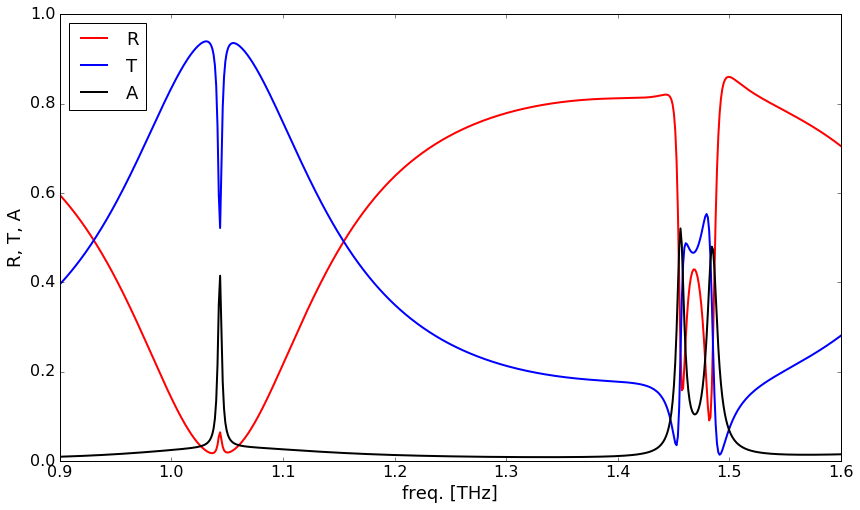

In [31]:
nI = 1.0
epsGR = -1500
epsRD = (3.6+0.005j)**2
nII = 1.0
Lambda = 100e-6
fillRD = 0.90
d= 50e-6
theta = 15
N = 41
NN = (N - 1) / 2
f1 = 0.9e12
f2 = 1.6e12
freq = f1
lambda_ = 3e8 / freq
imax = 600

# Set order array
if N%2 == 0:
    N = N + 1
    print 'Order replaced by odd number, N =',N

# Convert angle to radians
theta = theta * np.pi / 180.


Ref = np.zeros((imax, N+1))
Tra = np.zeros((imax, N+1))
t = time.time()
for ii in range(imax):
    
    R, T = dTE(nI, epsGR, epsRD, nII, Lambda, fillRD, d, lambda_, theta, N, 0, 0);

    Ref[ii,0] = freq / 1e12;
    Ref[ii,1:N+1] = R
    Tra[ii,0] = freq / 1e12
    Tra[ii,1:N+1] = T

    freq = freq + (f2 - f1) / (imax - 1)
    lambda_ = 3e8 / freq
print "Ellapsed time:", time.time()-t

fig = plt.figure(figsize=(14, 8))
fig.add_subplot()
plt.tick_params(axis='both', which='major', labelsize=16)
plt.plot(Ref[:,0], Ref[:,(N+1)/2],'r', linewidth=2)
plt.plot(Tra[:,0], Tra[:,(N+1)/2],'b', linewidth=2)
plt.plot(Tra[:,0], 1 - Tra[:,(N+1)/2] -Ref[:,(N+1)/2],'k', linewidth=2)
plt.xlim([f1/1e12, f2/1e12])
plt.ylim([0, 1])

plt.ylabel('R, T, A', fontsize=18)
plt.xlabel('freq. [THz]', fontsize=18)
plt.legend(['R', 'T', 'A'], loc=0, fontsize=18)

# Calculating the fields

0
1
2
3
4


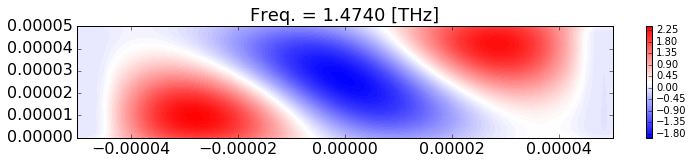

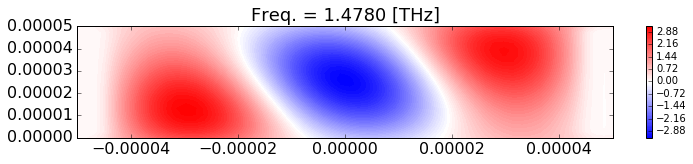

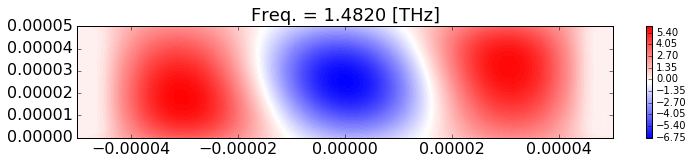

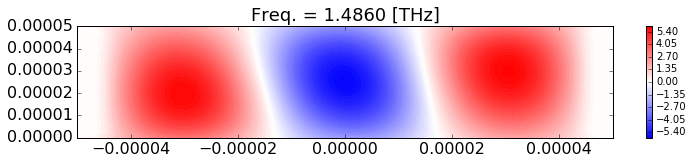

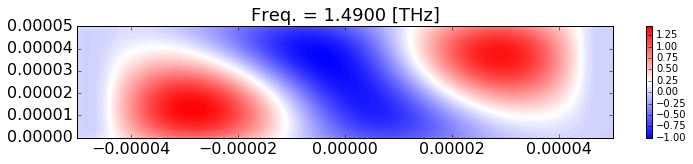

In [32]:
nI = 1.0
epsGR = -1500
epsRD = (3.6)**2
nII = 1.0
Lambda = 100e-6
fillRD = 0.90
d= 50e-6
theta = 15
N = 41
NN = (N - 1) / 2

# Set order array
if N%2 == 0:
    N = N + 1
    print 'Order replaced by odd number, N =',N

# Convert angle to radians
theta = theta * np.pi / 180.


Ref = np.zeros((imax, N+1))
Tra = np.zeros((imax, N+1))
t = time.time()

x = np.linspace(-Lambda/2, Lambda/2, 60)
z = np.linspace(0, d, 20)
Egy = np.zeros((len(z), len(x))) + 0.j
Hgx = np.zeros((len(z), len(x))) + 0.j

freq = 1.47e12
lambda_ = 3e8 / freq

for kk in range(5):
    print kk
    freq = freq + 0.004e12
    lambda_ = 3e8 / freq
    for jj in range(len(z)):
        kxi, Fz = dTE(nI, epsGR, epsRD, nII, Lambda, fillRD, d, lambda_, theta, N, z[jj], 1);
        for ii in range(len(x)):
            Egy[jj, ii] = np.real(np.sum(np.transpose(Fz[0:N]) * np.exp(1j * kxi * x[ii])))
            Hgx[jj, ii] = np.real(np.sum(np.transpose(Fz[N:2*N]) * np.exp(1j * kxi * x[ii])))

    fig = plt.figure(figsize=(12, 2))
    fig.add_subplot()
    plt.tick_params(axis='both', which='major', labelsize=16)

    #v = np.linspace(-4, 4, 50, endpoint=True)
    plt.contourf(x, z, Egy, 100, cmap=plt.cm.bwr)
    plt.colorbar()
    plt.title("Freq. = %.4f [THz]"%(freq/1e12), fontsize=18)


----------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------